In [ ]:
import numpy as np
#from tools.tools import *
from myastrotools.tijuca import *
import astropy.units as u
import pandas as pandas

def Run1Model(p, num_tangle = 6, num_gangle = 6):

    grid = p['name']
    ## Planet:
    planettype = p['planet_type']
    Tint = p['tint'] # Internal Temperature of your Planet in K
    Teq = ComputeTeq(p['st_teff'], p['rstar']*u.Rsun, p['au']*u.au, 
                     Ab = 0.3, fprime = 1/4) # planet equilibrium temperature 
    radius = p['pl_rad'] #Rjup
    massj = p['pl_mass']
    semi_major = p['au']
    phase = p['phase']

    ## Star:
    T_star = p['st_teff'] # K, star effective temperature
    logg = p['logg'] #logg , cgs
    metal = p['feh'] # metallicity of star
    r_star = p['rstar'] # solar radius


    ## Climate:
    nlevel = p['nlevel'] # number of plane-parallel levels in your code
    nofczns = p['nofczns'] # number of convective zones initially. Let's not play with this for now.
    nstr_upper = p['nstr_upper'] # top most level of guessed convective zone
    nstr_deep = nlevel -2 # this is always the case. Dont change this
    nstr = np.array([0,nstr_upper,nstr_deep,0,0,0]) # initial guess of convective zones
    rfacv = p['rfacv']

    ## Opacities:
    #
    planet_mh = p['mh']
    planet_mh_CtoO = p['cto']

    Teq_str = np.round(Teq, decimals=0)
    directory = f'{grid}-{planettype}-Tstar{T_star}-Rstar{r_star}-Teq{Teq_str}-sep{semi_major}-rad{radius}-mass{massj}-mh{planet_mh}-co{planet_mh_CtoO}-phase{phase}'
    #savefiledirectory = p['output_dir']+directory
    output_dir = ''
    savefiledirectory = output_dir+directory

    local_ck_path = f'/Volumes/Oy/picaso/reference/kcoeff_2020/'
    #local_ck_path = p['local_ck_path']

        
        
    planet_properties = {
        'tint':Tint, 'Teq':Teq, 'radius':radius, 'radius_unit':u.Rjup,
         'mass':massj, 'mass_unit': u.Mjup,
         'gravity': None, 'gravity_unit':None,
        'semi_major':semi_major, 'semi_major_unit': u.AU,
        'mh': planet_mh, 'CtoO':planet_mh_CtoO, 'phase':phase, 'num_tangle':num_tangle,
        'num_gangle':num_gangle, 'noTiOVO':p['noTiOVO'], 'planet_mh_str':p['mh_str'],
        'local_ck_path':local_ck_path
    }

    star_properties = {
        'Teff':T_star, 'logg':logg, 'mh':metal, 'radius':r_star
    }

    climate_run_setup = {'climate_pbottom':p['p_bottom'],
            'climate_ptop':p['p_top'],
            'nlevel':nlevel, 'nofczns':nofczns, 'nstr_upper':nstr_upper,
            'nstr_deep':nstr_deep, 'rfacv':rfacv
    }
    #opa_file = p['opa_file']
    opa_file = None
    wave_range = [float(p['wave_range'].split(',')[0].replace('[','')),
              float(p['wave_range'].split(',')[1].replace(' ','').replace(']',''))]
    spectrum_setup = {'opacity_db':opa_file,
                      'wave_range':wave_range,
                      'calculation':'reflected', 'R':150
                     }

    if p['guess'] == 'guillot':
        use_guillotpt = True


    cj = MakeModelCloudFreePlanet(planet_properties, 
                            star_properties,
                            use_guillotpt = True,
                            cdict = climate_run_setup, 
                            compute_spectrum = True,
                            specdict = spectrum_setup,
                            savefiledirectory = savefiledirectory
                 )
    return savefiledirectory, cj

def RunGrid(sheet_id='11u2eirdZcWZdjnKFn3vzqbCtKCodstP-KnoGXC5FdR8', 
             sheet_name='GasGiantsBaseModels'):
    import time
    url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&gid={sheet_name}"
    k = open('RunReport.txt','w')
    k.close()
    p = pd.read_csv(url)
    p = p.dropna(axis=1, how='all')
    savefiledirectory, cj = Run1Model(p.loc[0])
    with open(directory+'/terminal_output.txt','r') as f:
        z = f.read()
        k = open('RunReport.txt','a')
        t = time.localtime()
        outtime = str(t.tm_year)+'-'+str(t.tm_mon)+'-'+str(t.tm_mday)+'-'+str(t.tm_hour)+':'+str(t.tm_min)+':'+str(t.tm_sec)
        if 'YAY ! ENDING WITH CONVERGENCE' in z:
            k.write(directory + ' ' +outtime + '  converged \n')
        else:
            k.write(directory + ' ' +outtime + '  FAILED \n')
        k.close()
        
    return p


p = RunGrid()




In [44]:
savefiledirectory = 'ReflectXGasGiantModelGrid-Neptune-Tstar3000-Rstar0.2-Teq187.1302769665348-sep0.1-rad0.35-mass0.05-mh100-co0.5-phase0'
pl, noclouds = pickle.load(open(savefiledirectory+'/cloud-free-model.pkl','rb'))
pdict, sdict, cdict = pickle.load(open(savefiledirectory+'/cloud-free-model-inputs.pkl','rb'))
import picaso.justdoit as jdi
wave_range = [float(p['wave_range'][0].split(',')[0].replace('[','')),
              float(p['wave_range'][0].split(',')[1].replace(' ','').replace(']',''))]
opacity = jdi.opannection(wave_range=wave_range)

Turning off Raman for Non-H2 atmosphere


NameError: name 'df' is not defined

<Figure size 800x600 with 0 Axes>

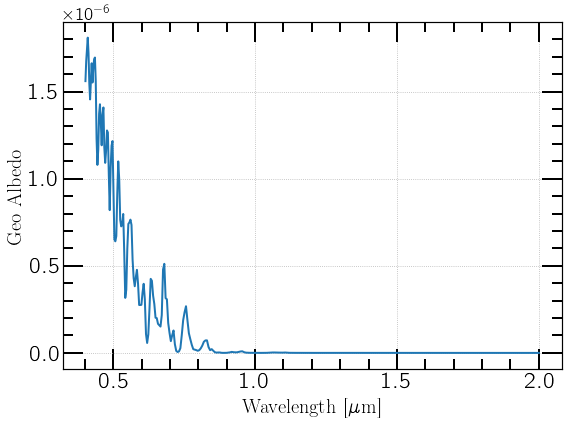

<Figure size 800x600 with 0 Axes>

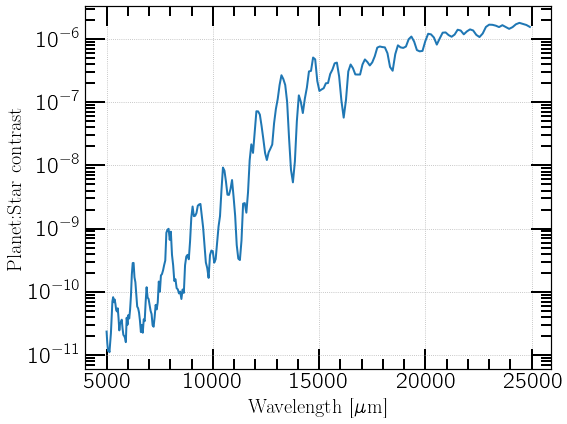

In [23]:
savefiledirectory = 'ReflectXGasGiantModelGrid-Neptune-Tstar3000-Rstar0.2-Teq187.1302769665348-sep0.1-rad0.35-mass0.05-mh100-co0.5-phase0'
pl, noclouds = pickle.load(open(savefiledirectory+'/cloud-free-model.pkl','rb'))
pdict, sdict, cdict = pickle.load(open(savefiledirectory+'/cloud-free-model-inputs.pkl','rb'))

def ComputeSpectrum(atm_df, pdict, sdict, specdict, 
                    opacity_db=None, calculation = 'planet',
                   saveplots = True, savefiledirectory = None):
    
    import picaso.justdoit as jdi
    if opacity_db == None:
        opa_mon = jdi.opannection(wave_range=specdict['wave_range'])
    else:
        opa_mon = jdi.opannection(filename_db = opacity_db, wave_range=specdict['wave_range'])
    spec = jdi.inputs(calculation="planet")

    spec.phase_angle(phase=pdict['phase']*np.pi/180, num_tangle=pdict['num_tangle'],
                     num_gangle=pdict['num_gangle'])
    if not pdict['gravity']:
        spec.gravity(radius=pdict['radius'], radius_unit=pdict['radius_unit'], 
            mass = pdict['mass'], mass_unit=pdict['mass_unit'])
    else:
        spec.gravity(gravity=pdict['gravity'], gravity_unit=pdict['gravity_unit'])

    # set up star:
    spec.star(opa_mon, temp = sdict['Teff'], metal = np.log10(sdict['mh']), logg = sdict['logg'], 
            radius = sdict['radius'], radius_unit = u.R_sun, 
            semi_major = pdict['semi_major'], semi_major_unit = pdict['semi_major_unit'], database = 'phoenix')

    spec.atmosphere(df=atm_df['ptchem_df'])
    spec_df = spec.spectrum(opa_mon, 
                            calculation='reflected', 
                            full_output=True)
    wno, alb, fpfs, full_output = spec_df['wavenumber'], spec_df['albedo'], \
                                    spec_df['fpfs_reflected'],  spec_df['full_output']
    wno,fpfs = jdi.mean_regrid(spec_df['wavenumber'],
                          spec_df['fpfs_reflected'], R=specdict['R'])
    wno,alb = jdi.mean_regrid(spec_df['wavenumber'],
                          spec_df['fpfs_reflected'], R=specdict['R'])
    if saveplots:
        # Albedo plot
        plt.figure()
        plt.figure(figsize=(8,6))
        plt.minorticks_on()
        plt.tick_params(axis='both',which='major',length =20, width=2,direction='in',labelsize=23)
        plt.tick_params(axis='both',which='minor',length =10, width=2,direction='in',labelsize=23)

        plt.plot(1e4/wno, alb, lw=2)

        plt.gca().set_xlabel(r'Wavelength [$\mu$m]')
        plt.gca().set_ylabel('Geo Albedo')
        plt.grid(ls=':')
        plt.tight_layout()
        plt.savefig(savefiledirectory+'/cloud-free-albedo-spectrum-R'+str(specdict['R'])+'.png',
                    bbox_inches='tight')

        # reflected plot
        plt.figure()
        plt.figure(figsize=(8,6))
        plt.minorticks_on()
        plt.tick_params(axis='both',which='major',length =20, width=2,direction='in',labelsize=23)
        plt.tick_params(axis='both',which='minor',length =10, width=2,direction='in',labelsize=23)

        plt.plot(wno, fpfs, lw=2)
        plt.gca().set_yscale('log')

        plt.gca().set_xlabel(r'Wavelength [$\mu$m]')
        plt.gca().set_ylabel('Planet:Star contrast')
        plt.grid(ls=':')
        plt.tight_layout()
        plt.savefig(savefiledirectory+'/cloud-free-fpfs-spectrum-R'+str(specdict['R'])+'.png',
                    bbox_inches='tight')

        pickle.dump(df, open(savefiledirectory+'/cloud-free-spectrum-full-output-R'+str(specdict['R'])+'.pkl','wb'))
    
    return wno, alb, fpfs, spec_df['full_output']
    
spectrum_setup = {'wave_range':[0.4,2],
                      'calculation':'reflected', 'R':150
                     }
wno, alb, fpfs, full_output = ComputeSpectrum(noclouds, pdict, sdict, spectrum_setup, 
                                              calculation = 'planet',
                                              savefiledirectory = savefiledirectory)
